In [27]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt
import time, numpy as np, seaborn as sns
from sklearn import  tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
sns.set(style="ticks", color_codes=True)
"Done"

'Done'

In [8]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Asesmen Data Science/Data_PreProcessed.csv')
df.head(10)

N, P = df.shape # Ukuran Data
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
print("Tipe Variabe df = ", type(df))
df

baris =  668 , Kolom (jumlah variabel) =  15
Tipe Variabe df =  <class 'pandas.core.frame.DataFrame'>


,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status kredit,bi_gol_penjamin__0,bi_gol_penjamin__800,bi_gol_penjamin__835,bi_gol_penjamin__874,bi_gol_penjamin__875,_L,_P
0,40.0,345000.0,1.0,345000.0,345000.0,345000.0,0.0,MACET,0,0,0,0,1,0,1
1,31.0,350000.0,7.0,55716.0,390000.0,111428.0,0.0,MACET,0,0,0,0,1,1,0
2,34.0,3055499.0,8.0,NaN,3055499.0,NaN,0.0,MACET,0,0,0,0,1,0,1
3,27.0,4435001.0,8.0,671098.0,4435001.0,0.0,0.0,LANCAR,0,0,0,0,1,1,0
4,49.0,1443750.0,15.0,107800.0,1617000.0,1078000.0,0.0,MACET,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,24.0,1500000.0,16.0,105000.0,700000.0,700000.0,90000.0,MACET,1,0,0,0,0,0,1
664,38.0,1000000.0,16.0,70000.0,812500.0,812500.0,97500.0,MACET,1,0,0,0,0,1,0
665,36.0,1000000.0,12.0,NaN,429000.0,429000.0,45000.0,MACET,1,0,0,0,0,0,1
666,31.0,1312500.0,7.0,198750.0,1312500.0,1312500.0,78750.0,MACET,1,0,0,0,0,0,1


**Lakukan Splitting Data**

In [9]:
predictor = df.loc[:, ~df.columns.isin(['status kredit'])]
target = df['status kredit']

# Splitting into train-test split
xTrain, xTest, yTrain, yTest = train_test_split(predictor, target, test_size=0.3, random_state=33)
print(xTrain.shape, yTrain.shape)
print(xTest.shape, yTest.shape)

(467, 14) (467,)
(201, 14) (201,)


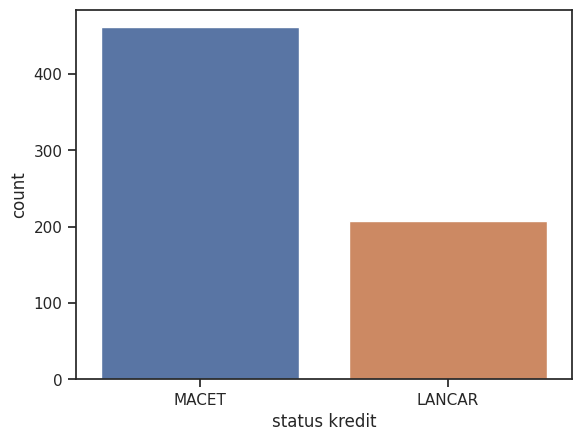

Counter({'MACET': 461, 'LANCAR': 207})
MACET =  69.0119760479042 % LANCAR =  30.98802395209581 %


In [10]:
# Visual Python: Visualization > Seaborn
from collections import Counter

sns.countplot(data=df, x='status kredit')
plt.show()

D = Counter(df['status kredit'])
print(D)
print("MACET = ", D['MACET']*100/(len(df['status kredit'])), '% LANCAR = ',D['LANCAR']*100/(len(df['status kredit'])) ,'%')

**Logistic Regression**

In [14]:
# Membuat pipeline dengan SimpleImputer dan Logistic Regression
pipeline = make_pipeline(SimpleImputer(strategy='mean'), LogisticRegression())

# Melatih model menggunakan pipeline
pipeline.fit(xTrain, yTrain)

# Melakukan prediksi
prediksi_regLog = pipeline.predict(xTest)

# Evaluasi model
print(confusion_matrix(yTest, prediksi_regLog))
print(classification_report(yTest, prediksi_regLog))

[[ 54  13]
 [  8 126]]
              precision    recall  f1-score   support

      LANCAR       0.87      0.81      0.84        67
       MACET       0.91      0.94      0.92       134

    accuracy                           0.90       201
   macro avg       0.89      0.87      0.88       201
weighted avg       0.89      0.90      0.89       201



**Cross Validation**

In [16]:
# Mengukur waktu eksekusi
mulai = time.time()

# Menghitung skor cross-validation
scores_regLog = cross_val_score(pipeline, predictor, target, cv=10)

# Mengukur waktu eksekusi
waktu = time.time() - mulai

# Menampilkan hasil
print("Accuracy Regresi Logistik: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_regLog.mean(), scores_regLog.std() * 2, waktu))

Accuracy Regresi Logistik: 0.90 (+/- 0.07), Waktu = 0.108 detik


RegLog    0.865672
dtype: float64

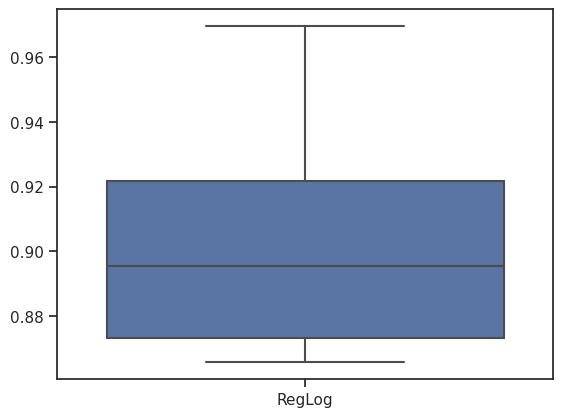

In [17]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_ = pd.DataFrame({'RegLog': scores_regLog})
p = sns.boxplot(data = df_)
df_.min()

In [21]:
# Melatih model menggunakan pipeline
pipeline.fit(predictor, target)

# Mendapatkan koefisien dari model
koefisien_reglog = pipeline.named_steps['logisticregression'].coef_[0]

# Menampilkan koefisien
print("Koefisien Regresi Logistik:", koefisien_reglog)

Koefisien Regresi Logistik: [ 5.04484881e-09 -7.15361276e-07  2.72062282e-08 -6.21188527e-06
  2.40649782e-07  1.13897425e-05  4.29157191e-06 -1.08412202e-09
  1.52664662e-11  7.35802842e-12  3.67715783e-11  1.08312788e-09
 -2.37741784e-10  2.96143715e-10]


**Decision Tree**

In [29]:
# Decision Tree Algorithm
# Decision Tree: http://scikit-learn.org/stable/modules/tree.html
# Membagi data menjadi data latih dan data uji
xTrain, xTest, yTrain, yTest = train_test_split(predictor, target, test_size=0.2, random_state=42)

# Menggunakan SimpleImputer untuk mengisi nilai-nilai yang hilang
imputer = SimpleImputer(strategy='mean')
xTrain_imputed = imputer.fit_transform(xTrain)
xTest_imputed = imputer.transform(xTest)

# Membuat dan melatih model DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=0)
DT.fit(xTrain_imputed, yTrain)

# Melakukan prediksi
prediksi_DT = DT.predict(xTest_imputed)

# Evaluasi model
print(confusion_matrix(yTest, prediksi_DT))
print(classification_report(yTest, prediksi_DT))

[[33  4]
 [ 3 94]]
              precision    recall  f1-score   support

      LANCAR       0.92      0.89      0.90        37
       MACET       0.96      0.97      0.96        97

    accuracy                           0.95       134
   macro avg       0.94      0.93      0.93       134
weighted avg       0.95      0.95      0.95       134



In [30]:
# Varible importance - Salah satu kelebihan Decision Tree
DT.feature_importances_

array([0.00985725, 0.10363044, 0.01368315, 0.00621651, 0.01635083,
       0.5914697 , 0.25303905, 0.00575307, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

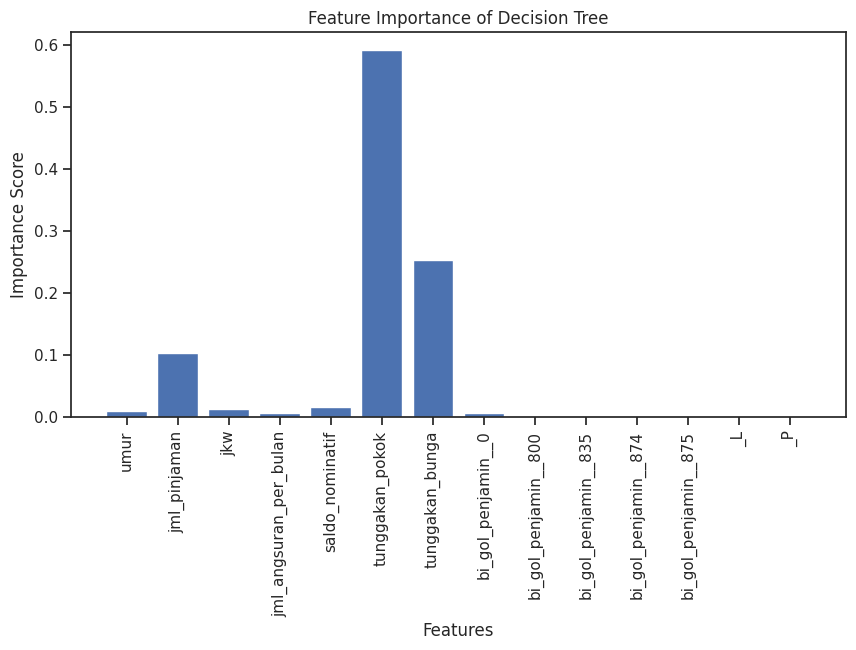

In [31]:
# Assuming your model is fitted, you can access feature importances
feature_importances = DT.feature_importances_

# Assuming you have feature names (replace feature_names with your actual feature names)
feature_names = df.drop('status kredit', axis=1).columns

# Visualize the feature importances
plt.figure(figsize=(10, 5))
plt.bar(feature_names, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance of Decision Tree')
plt.xticks(rotation=90)
plt.show()

In [33]:
# Membuat pipeline dengan SimpleImputer dan DecisionTreeClassifier
pipeline = make_pipeline(SimpleImputer(strategy='mean'), DecisionTreeClassifier(random_state=0))

# Menghitung skor cross-validation
mulai = time.time()
scores_dt = cross_val_score(pipeline, predictor, target, cv=10)
waktu = time.time() - mulai

# Menampilkan hasil
print("Accuracy Decision Tree: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_dt.mean(), scores_dt.std() * 2, waktu))

Accuracy Decision Tree: 0.94 (+/- 0.08), Waktu = 0.322 detik


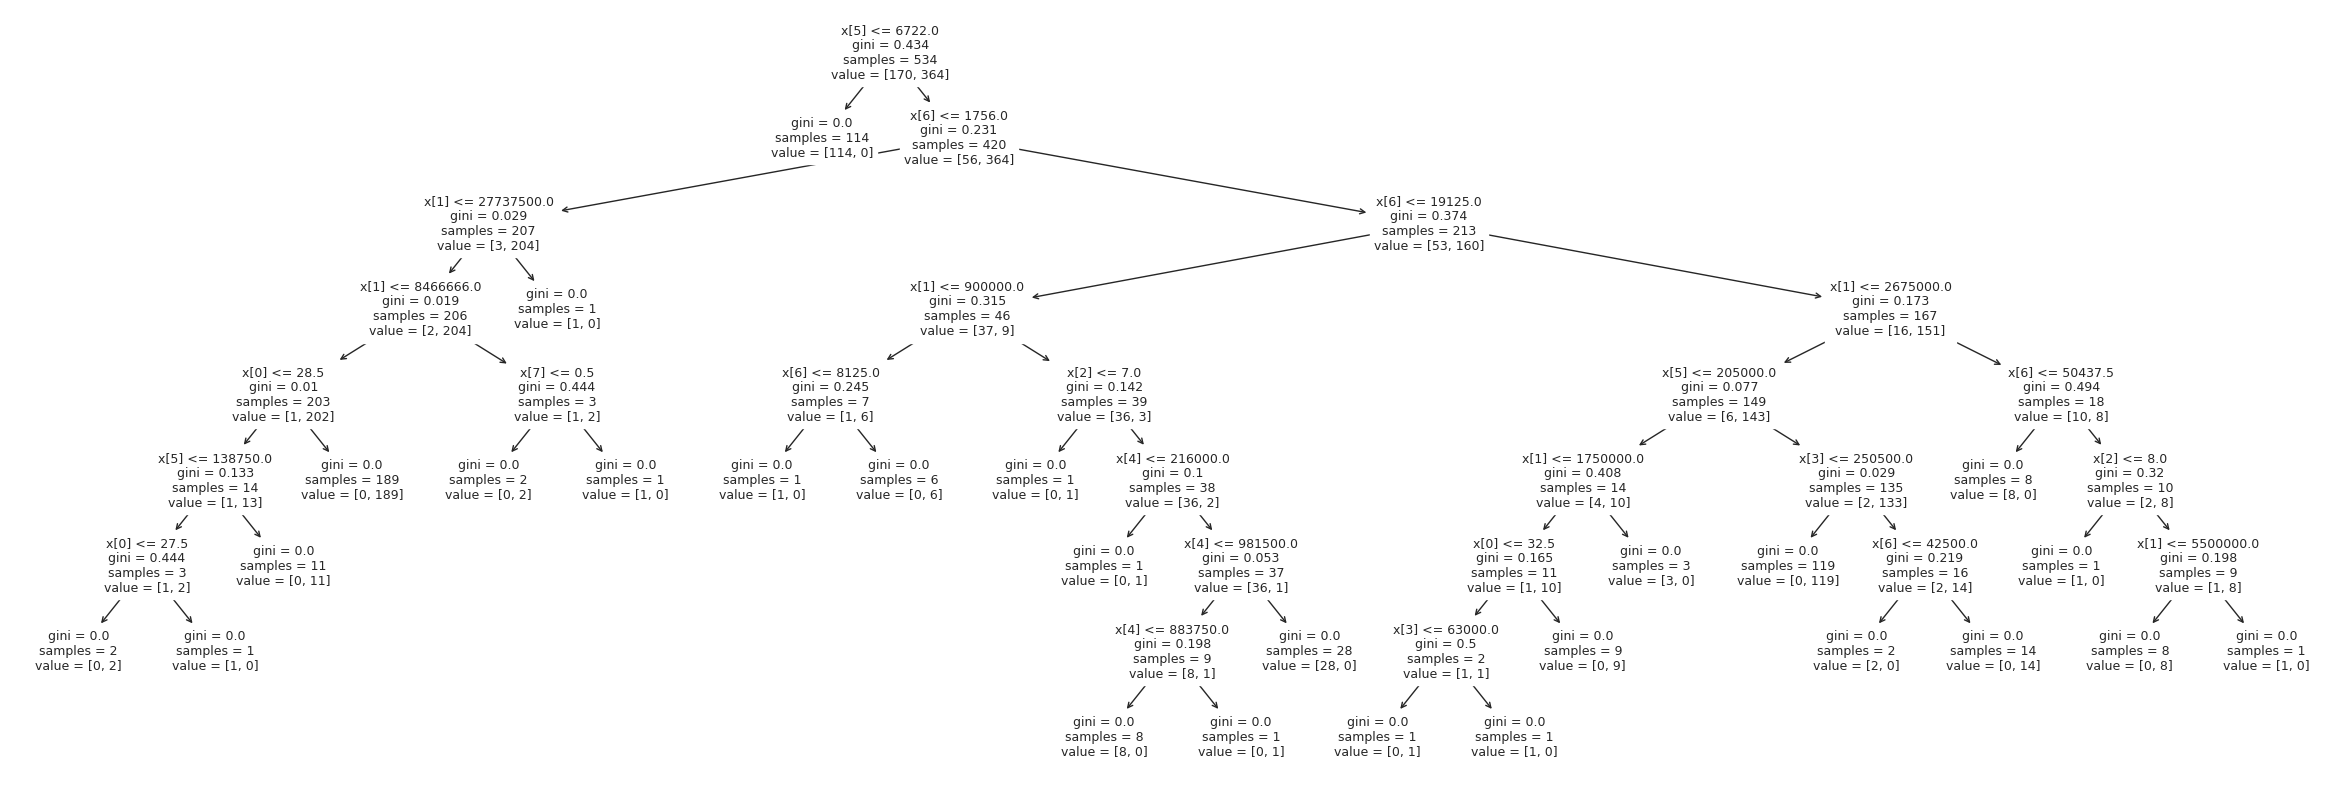

In [35]:
plt.figure(figsize=(30,10))
p = tree.plot_tree(DT)

Minimum Score RegLog: 0.8656716417910447
Minimum Score DecTree: 0.8955223880597015
Maximum Score RegLog: 0.9696969696969697
Maximum Score DecTree: 1.0


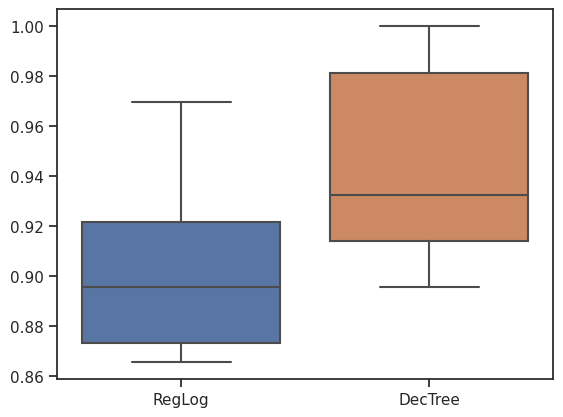

In [39]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_ = pd.DataFrame({'RegLog': scores_regLog, "DecTree":scores_dt})
p = sns.boxplot(data = df_)

# Menampilkan nilai minimum dari kedua model
print("Minimum Score RegLog:", df_scores['RegLog'].min())
print("Minimum Score DecTree:", df_scores['DecTree'].min())
print("Maximum Score RegLog:", df_scores['RegLog'].max())
print("Maximum Score DecTree:", df_scores['DecTree'].max())